In [ ]:
%%writefile fractalCompression.cu
//!sudo apt-get install libopencv-dev build-essential
#include <stdio.h>
#include <stdlib.h>
#include <cuda_runtime.h>
#include <opencv2/opencv.hpp>
#include <cmath>
#include<ctime>
using namespace std;
using namespace cv;

#define N 128
#define THREADS_PER_BLOCK 16

using namespace std;


void {
  FILE *file = fopen(filename, "rb");
    if (!file) {
        fprintf(stderr, "Error opening file %s\n", filename);
        exit(1);
    }

    // Read image width and height from file headers
    fseek(file, 18, SEEK_SET); // Move to width and height bytes
    fread(width, sizeof(int), 1, file);
    fread(height, sizeof(int), 1, file);

    // Read image pixel data
    fseek(file, 54, SEEK_SET); // Move to pixel data
    for (int y = 0; y < *height; y++) {
        for (int x = 0; x < *width; x++) {
            // Read RGB values for each pixel
            fread(&image[y][x][2], 1, 1, file); // Blue channel
            fread(&image[y][x][1], 1, 1, file); // Green channel
            fread(&image[y][x][0], 1, 1, file); // Red channel
        }
    }

    fclose(file);
}


void resizeAndStoreImage(const string& filename, int width, int height) {

    Mat image = imread(filename);

    if (image.empty()) {
        cerr << "Error: Could not open or find the image" <<endl;
        return;
    }

    // Resize the image to the desired dimensions
    Mat resizedImage;
    resize(image, resizedImage, Size(width, height));

    // Convert the resized image to grayscale
    cvtColor(resizedImage, resizedImage, COLOR_BGR2GRAY);

    // Store pixel values in the array
    for (int i = 0; i < height; ++i) {
        for (int j = 0; j < width; ++j) {
            img[i][j] = resizedImage.at<uchar>(i, j);
        }
    }
    cout << "Image has been resized and stored in a 2D array." << std::endl;
}


// Matrix multiplication kernel
__global__ void fractalCompression(int* A, int* B,int* C) {
    int row = min((threadIdx.y)*4,124);
    int col = min((threadIdx.x)*4,124);

}




// Function to initialize matrices with random values

// Function to compare results on CPU
int main() {

    clock_t start_time=clock();

    string filename = "resizedimg.jpg";
    int width = 128;
    int height = 128;

    resizeAndStoreImage(filename, width, height);
    compress();


    int* A, * B, * C; // Host matrices
    int* d_A, * d_B, * d_C; // Device matrices

    // Allocate host memory
    A = (int*)malloc(N * N * sizeof(int));
    B = (int*)malloc(64*64 * sizeof(int));
    C = (int*)malloc(32*32*3 * sizeof(int));

    for(int i=0;i<128*128;i++){
      A[i]=img[i/128][i%128];
    }
    for(int i=0;i<64*64;i++){
      B[i]=cmp[i/64][i%64];
    }

    // Allocate device memory
    cudaMalloc((void**)&d_A, N * N * sizeof(int));
    cudaMalloc((void**)&d_B, 64*64 * sizeof(int));
    cudaMalloc((void**)&d_C, 32*32*3 * sizeof(int));

    // Copy data from host to device
    cudaMemcpy(d_A, A, N * N * sizeof(int), cudaMemcpyHostToDevice);
    cudaMemcpy(d_B, B, 64*64 * sizeof(int), cudaMemcpyHostToDevice);

    // Define grid and block dimensions
    dim3 threadsPerBlock(32, 32);
    dim3 blocksPerGrid(1,1);

    // Create CUDA events for timing
    cudaEvent_t start, stop;
    cudaEventCreate(&start);
    cudaEventCreate(&stop);

    // Launch kernel
    fractalCompression<<<blocksPerGrid, threadsPerBlock>>>(d_A, d_B, d_C);



    // Copy result from device to host
    cudaMemcpy(C, d_C, 32*32*3*sizeof(int), cudaMemcpyDeviceToHost);



    // Free allocated memory
    free(A);
    free(B);
    free(C);
    cudaFree(d_A);
    cudaFree(d_B);
    cudaFree(d_C);

    clock_t end_time=clock();
    double elapsed_time=double(end_time-start_time)/CLOCKS_PER_SEC;

    printf("\nTime Taken: %f Seconds \n",elapsed_time);

    printf("Contents of fractal file are: \n");

    FILE *fp;
    fp = fopen("fractalFile.txt", "w");


    for(int i=0;i<32*32*3;i+=3){
      //printf("Block No. %d Coordinates (%d,%d) orientation %d \n",i/3,C[i],C[i+1],C[i+2]);
      fprintf(fp,"%d %d %d\n",C[i],C[i+1],C[i+2]);
    }
    fclose(fp);

    printf("Data written to file successfully.\n");

    return 0;
}

negative


In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

img=cv.imread("me.jpg")

img=cv.resize(img,(512,512))

img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

print(img.shape)

for i in range (512):
  for j in range (512):
    img[i][j]=255-img[i][j]

fig,axs=plt.subplots(1,1)

axs.imshow(img)

plt.show()



negative colour

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

img=cv.imread("me.jpg")

img=cv.resize(img,(512,512))

for i in range (512):
  for j in range(512):
    for k in range(3):
      img[i][j][k]=255-img[i][j][k]

img=cv.cvtColor(img,cv.COLOR_BGR2RGB)

fig,axs=plt.subplots(1,1)

axs.imshow(img)
plt.show()

sobel

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img =cv.imread("me.jpg")
img= cv.resize(img,(512,512))
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

sobelx= cv.Sobel(img,cv.CV_64F,1,0,ksize=3)
sobely= cv.Sobel(img,cv.CV_64F,0,1,ksize=3)

magnitude= np.sqrt(sobelx**2+sobely**2)

m=np.max(magnitude)

for i in range (512):
    for j in range(512):
      magnitude[i][j]=(magnitude[i][j]/m)*255

fig,axs=plt.subplots(1,1)
axs.imshow(magnitude,cmap='gray')
plt.show()


prewitt

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img=cv.imread("download.jpeg")
img=cv.resize(img,(512,512))
img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

prewittx=cv.filter2D(img,-1,np.array([[-1,0,1],[-1,0,1],[-1,0,1]]))
prewitty=cv.filter2D(img,-1,np.array([[1,1,1],[0,0,0],[-1,-1,-1]]))

n=np.sqrt(prewittx**2+prewitty**2)

m=np.max(n)

for i in range(512):
  for j in range(512):
    n[i][j]=(n[i][j]/m)*255

fig,axs=plt.subplots(1,1)

axs.imshow(n,cmap='gray')

plt.show()

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("download.jpeg")
img= cv.resize(img,(512,512))
img= cv.cvtColor(img,cv.COLOR_BGR2GRAY)

canny=cv.Canny(img,100,200)

fig,axs=plt.subplots(1,1)

axs.imshow(canny,cmap='gray')

plt.show()


3 hist

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img=cv.imread('me.jpg')
img=cv.resize(img,(512,512))

image_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

hist_red = cv.calcHist([image_rgb], [0], None, [256], [0, 256])
hist_green = cv.calcHist([image_rgb], [1], None, [256], [0, 256])
hist_blue = cv.calcHist([image_rgb], [2], None, [256], [0, 256])

image_gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
hist_gray = cv.calcHist([image_gray], [0], None, [256], [0, 256])



fig, axs = plt.subplots(2,2, figsize=(10,10))

axs[0,0].plot(hist_red, color='red')

axs[0,1].plot(hist_green, color='green')

axs[1,0].plot(hist_blue, color='blue')

axs[1,1].plot(hist_gray, color='gray')

plt.show()

hito equalise

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

original=cv.imread('me.jpg')
original=cv.resize(original,(512,512))
original=cv.cvtColor(original,cv.COLOR_BGR2HSV)

equalized=cv.imread("me.jpg")
equalized=cv.resize(equalized,(512,512))
equalized=cv.cvtColor(equalized,cv.COLOR_BGR2HSV)
equalized[:,:,1]=cv.equalizeHist(equalized[:,:,1])


originalHisto=cv.calcHist([original], [1], None, [256], [0, 256])
equalizedHisto=cv.calcHist([equalized], [1], None, [256], [0, 256])

equalized=cv.cvtColor(equalized,cv.COLOR_HSV2RGB)
original=cv.cvtColor(original,cv.COLOR_HSV2RGB)
# original
fig,axs=plt.subplots(2,2)

axs[0][0].imshow(original)
axs[0][0].set_title('Original Image')
axs[0][0].axis('off')
axs[0][1].imshow(equalized)
axs[0][1].set_title('Equalized Image')
axs[0][1].axis('off')

axs[1][0].plot(originalHisto)
axs[1][1].plot(equalizedHisto)


plt.tight_layout()
plt.show()

scalling

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

img=cv.imread("me.jpg")
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
img2=cv.imread("me.jpg")
img2=cv.cvtColor(img2,cv.COLOR_BGR2RGB)

img2=cv.resize(img,(512,512))
img2=cv.resize(img2,None,fx=2.0,fy=2.0)

fig,axs=plt.subplots(1,1)

axs.imshow(img2)

plt.show()

shifting

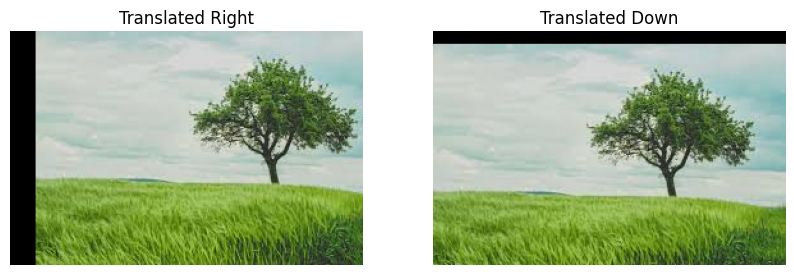

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the input image
image = cv2.imread('input_image.jpeg')

# Define the translation matrix for shifting the image to the right by 20 units and downwards by 10 units
translation_matrix_right = np.float32([[1, 0, 20], [0, 1, 0]])
translation_matrix_down = np.float32([[1, 0, 0], [0, 1, 10]])

# Apply the translation matrices to shift the image
translated_right = cv2.warpAffine(image, translation_matrix_right, (image.shape[1], image.shape[0]))
translated_down = cv2.warpAffine(image, translation_matrix_down, (image.shape[1], image.shape[0]))

# Display the translated images using Matplotlib
plt.figure(figsize=(10, 6))

# Translated Right Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(translated_right, cv2.COLOR_BGR2RGB))
plt.title('Translated Right')
plt.axis('off')

# Translated Down Image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(translated_down, cv2.COLOR_BGR2RGB))
plt.title('Translated Down')
plt.axis('off')

plt.show()


Rotation

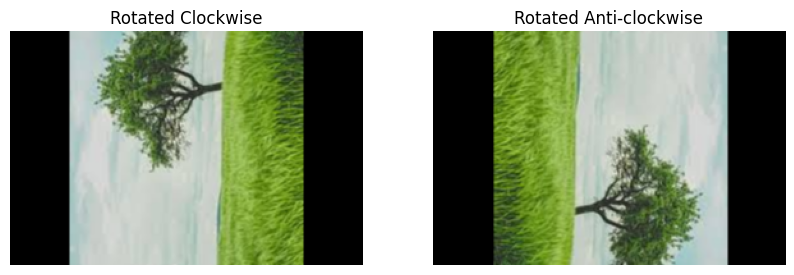

In [15]:
import cv2
import matplotlib.pyplot as plt

# Read the input image
image = cv2.imread('input_image.jpeg')

# Get the height and width of the image
height, width = image.shape[:2]

# Define the rotation angle (clockwise and anti-clockwise)
angle_clockwise = 90
angle_anticlockwise = -90

# Calculate the rotation matrix
rotation_matrix_clockwise = cv2.getRotationMatrix2D((width / 2, height / 2), angle_clockwise, 1)
rotation_matrix_anticlockwise = cv2.getRotationMatrix2D((width / 2, height / 2), angle_anticlockwise, 1)

# Apply the rotation matrices to rotate the image
rotated_clockwise = cv2.warpAffine(image, rotation_matrix_clockwise, (width, height))
rotated_anticlockwise = cv2.warpAffine(image, rotation_matrix_anticlockwise, (width, height))

# Display the rotated images using Matplotlib
plt.figure(figsize=(10, 6))

# Rotated Clockwise Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(rotated_clockwise, cv2.COLOR_BGR2RGB))
plt.title('Rotated Clockwise')
plt.axis('off')

# Rotated Anti-clockwise Image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated_anticlockwise, cv2.COLOR_BGR2RGB))
plt.title('Rotated Anti-clockwise')
plt.axis('off')

plt.show()


Compress and psnr

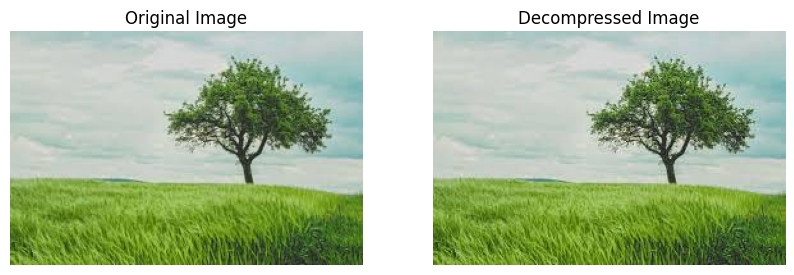

PSNR between Original and Decompressed Image: 36.775224218629944 dB


In [12]:
import cv2
import matplotlib.pyplot as plt

# Read the input image
original_image = cv2.imread('input_image.jpeg')

# Define the JPEG compression quality factor (0-100)
compression_quality = 70

# Encode the image using JPEG compression
success, encoded_image = cv2.imencode('.jpg', original_image, [cv2.IMWRITE_JPEG_QUALITY, compression_quality])

if not success:
    print("Error: Failed to encode image.")
else:
    # Decode the compressed image
    decompressed_image = cv2.imdecode(encoded_image, cv2.IMREAD_COLOR)

    # Calculate PSNR
    psnr = cv2.PSNR(original_image, decompressed_image)

    # Display original and decompressed images using Matplotlib
    plt.figure(figsize=(10, 6))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Decompressed Image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(decompressed_image, cv2.COLOR_BGR2RGB))
    plt.title('Decompressed Image')
    plt.axis('off')

    plt.show()

    # Print PSNR value
    print(f"PSNR between Original and Decompressed Image: {psnr} dB")


DCT

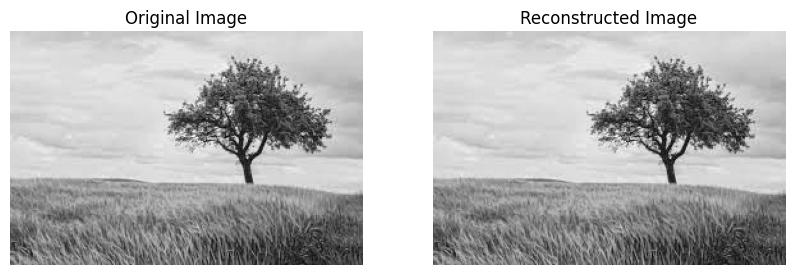

PSNR between Original and Reconstructed Image: 49.53612566443566 dB


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the input image
original_image = cv2.imread('input_image.jpeg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply DCT transformation
dct_image = cv2.dct(np.float32(gray_image))

# Apply inverse DCT transformation
reconstructed_image = cv2.idct(dct_image)

# Convert the reconstructed image back to uint8
reconstructed_image = np.uint8(reconstructed_image)

# Calculate PSNR
psnr = cv2.PSNR(gray_image, reconstructed_image)

# Display original and reconstructed images using Matplotlib
plt.figure(figsize=(10, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Reconstructed Image
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()

# Print PSNR value
print(f"PSNR between Original and Reconstructed Image: {psnr} dB")


DWT


In [1]:
!pip install PyWavelets


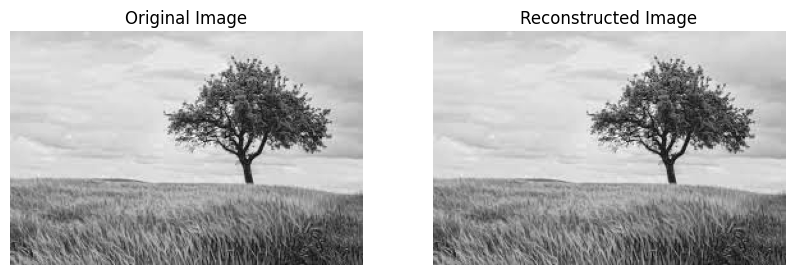

PSNR between Original and Reconstructed Image: 361.20199909921956 dB


In [8]:
import cv2
import pywt
import matplotlib.pyplot as plt

# Read the input image
original_image = cv2.imread('input_image.jpeg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply DWT transformation
coeffs = pywt.dwt2(gray_image, 'haar')

# Get the coefficients and the detail
cA, (cH, cV, cD) = coeffs

# Reconstruct the image
reconstructed_image = pywt.idwt2((cA, (cH, cV, cD)), 'haar')

# Ensure that the reconstructed image has the same dimensions as the original image
reconstructed_image = reconstructed_image[:gray_image.shape[0], :gray_image.shape[1]]

# Convert the reconstructed image back to uint8
reconstructed_image = cv2.convertScaleAbs(reconstructed_image)

# Calculate PSNR
psnr = cv2.PSNR(gray_image, reconstructed_image)

# Display original and reconstructed images using Matplotlib
plt.figure(figsize=(10, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Reconstructed Image
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()

# Print PSNR value
print(f"PSNR between Original and Reconstructed Image: {psnr} dB")


intensity slicing

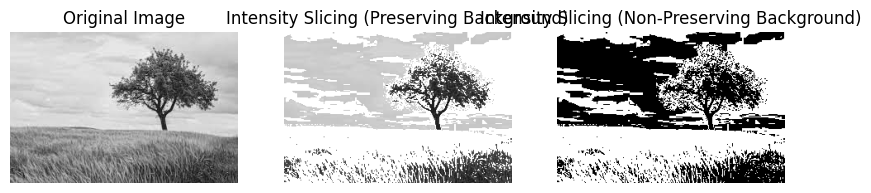

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the input image
image = cv2.imread('input_image.jpeg', cv2.IMREAD_GRAYSCALE)

# Define intensity ranges to preserve and highlight
low_threshold = 100
high_threshold = 200

# Apply intensity slicing with preserving the background
preserved_image = np.copy(image)
preserved_image[(image >= low_threshold) & (image <= high_threshold)] = 255

# Apply intensity slicing without preserving the background
non_preserved_image = np.zeros_like(image)
non_preserved_image[(image >= low_threshold) & (image <= high_threshold)] = 255

# Display the images using Matplotlib
plt.figure(figsize=(10, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Intensity Slicing (Preserving Background)
plt.subplot(1, 3, 2)
plt.imshow(preserved_image, cmap='gray')
plt.title('Intensity Slicing (Preserving Background)')
plt.axis('off')

# Intensity Slicing (Non-Preserving Background)
plt.subplot(1, 3, 3)
plt.imshow(non_preserved_image, cmap='gray')
plt.title('Intensity Slicing (Non-Preserving Background)')
plt.axis('off')

plt.show()
